In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Displays the loaded DataFrame, showing the first few rows of the diabetes dataset.
data= pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Removing rows where any of the specified columns are zero (since zero is likely invalid for these features)
unc = data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]
data = data[(unc != 0).all(axis=1)]

#Prints out any columns that still have zero values and how many.
for col in data.columns:
    zc = data[col] == 0
    if zc.sum() > 0:
        print(f"{col} has {zc.sum()} zero values")


Pregnancies has 56 zero values
Outcome has 262 zero values


In [ ]:
#let split the data into features (x) and target (y)
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

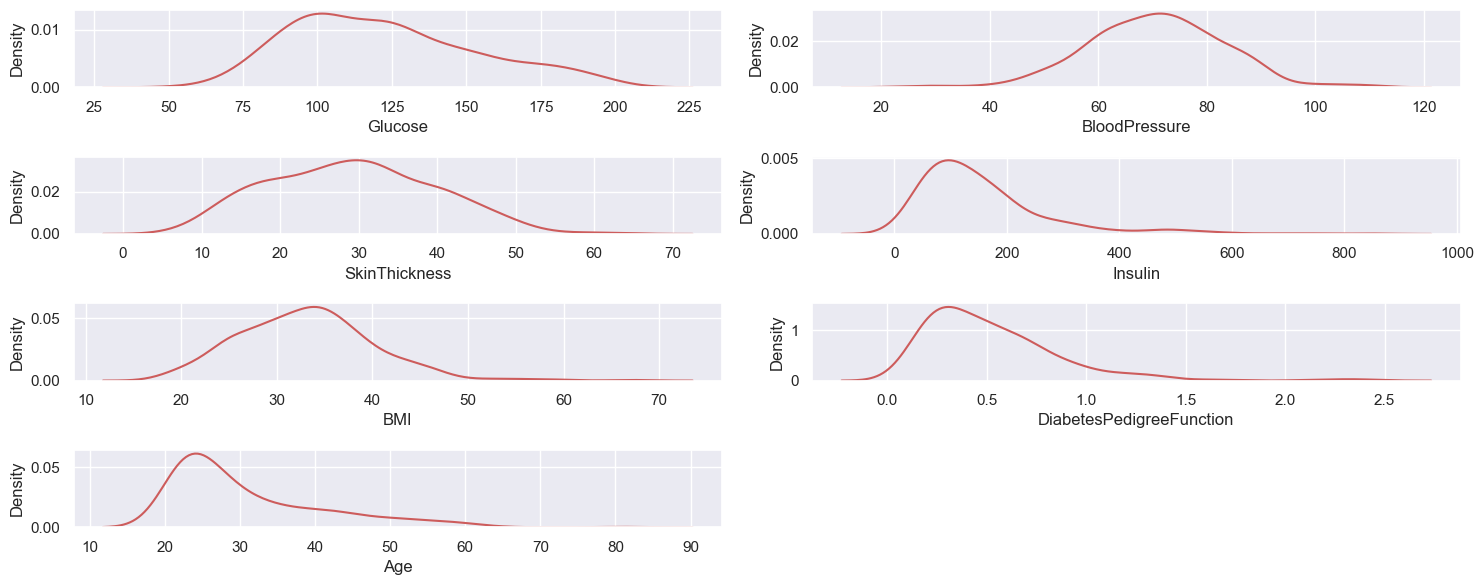

In [ ]:
#A kernel density plots for each feature, visualizing their distributions.
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=x[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
#checking the skewness value for each feature, indicating how much the distribution deviates from normal.
x.skew()

Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
Age                         1.403607
dtype: float64

In [ ]:
#transforming selected features to reduce skewness.
#Using PowerTransformer to apply a Yeo-Johnson transformation to the specified features.
from sklearn.preprocessing import PowerTransformer,StandardScaler
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Insulin', 'DiabetesPedigreeFunction', 'Age']
x_copy = pt.fit_transform(x[transform_features])

#making a dataframe of the x_copy with the transformed features.
x_copy = pd.DataFrame(x_copy, columns=transform_features)

In [ ]:
#checking skewness of the transformed features to see if the transformation was effective.
x_copy.skew()

Insulin                     0.001513
DiabetesPedigreeFunction    0.080712
Age                         0.214510
dtype: float64

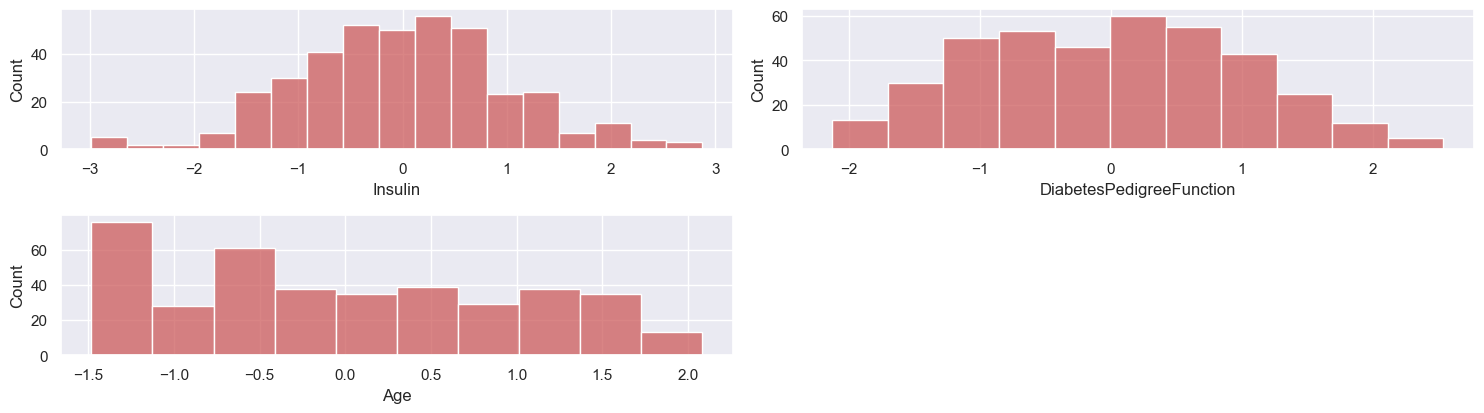

In [ ]:
#Plotting histograms of the transformed features to visualize their distributions after transformation.
plt.figure(figsize=(15, 10))
for i, col in enumerate(x_copy):
    plt.subplot(5, 2, i+1)
    sns.histplot(x=x_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
#Applying the PowerTransformer to all features in the dataset and scaling them using StandardScaler through a pipeline.
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("power", PowerTransformer(method='yeo-johnson')),
    ("scaler", StandardScaler())
])
x= pipeline.fit_transform(x)
#Converting the transformed features back into a DataFrame with the original column names.

x = pd.DataFrame(x, columns=data.columns[:-1])
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.679722,-1.163269,-0.389294,-0.538382,-0.402541,-0.677637,-1.477242,-1.481170
1,-1.639676,0.574434,-2.372525,0.593776,0.436887,1.371217,2.484524,0.634297
2,0.266180,-1.703899,-1.630983,0.324459,-0.496577,-0.218606,-0.950749,-0.285265
3,-0.124712,2.001230,-0.069687,1.441888,2.192231,-0.295072,-1.542083,1.658737
4,-0.679722,1.840088,-0.862120,-0.538382,2.875572,-0.357016,-0.190345,1.796740
...,...,...,...,...,...,...,...,...
387,-1.639676,1.671507,1.407671,1.360075,2.096478,1.394097,-1.109281,-0.285265
388,-0.679722,0.303783,1.407671,0.941451,-0.177338,0.559787,1.505623,0.961161
389,-0.124712,-1.209409,-1.017881,-0.240333,-2.813755,-0.628334,0.969109,-1.183845
390,1.621866,-0.648924,0.415907,1.683832,0.537961,0.062719,-1.448864,1.869485


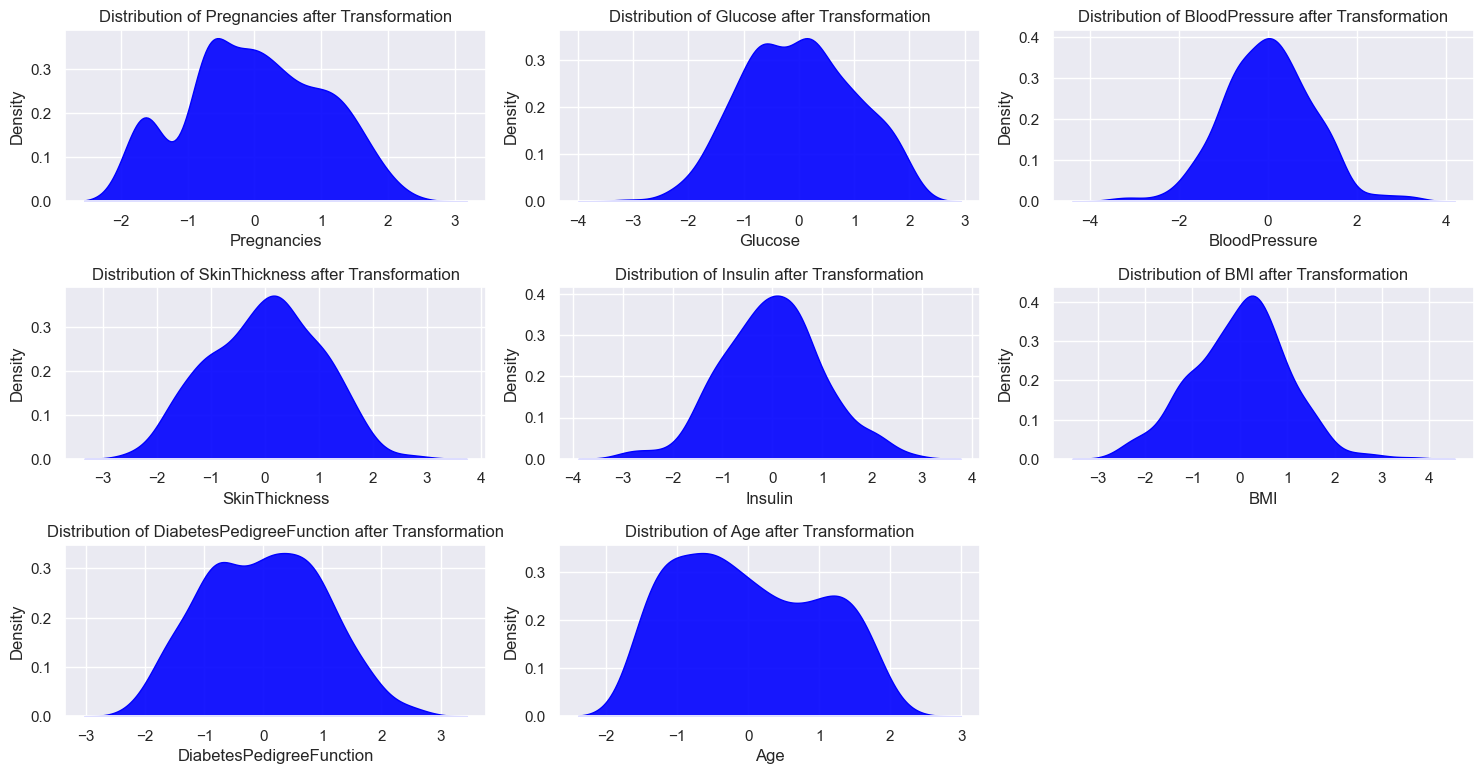

In [ ]:
#Plotting the kernel density estimates for each feature after transformation to visualize their distributions.
plt.figure(figsize=(15, 10))
for i,col in enumerate(x.columns):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=x[col], color='blue', fill=True, alpha=0.9)
    plt.title(f"Distribution of {col} after Transformation")
    plt.ylabel("Density")
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
#resampling the data to address class imbalance using SMOTEENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbors).
from imblearn.combine import SMOTETomek, SMOTEENN
smote = SMOTEENN(random_state=42, sampling_strategy='auto')


# Resampling the features (x) and target (y) using SMOTEENN to balance the classes.
x_resampled, y_resampled = smote.fit_resample(x, y)
x_resampled.shape, y_resampled.shape

((332, 8), (332,))

In [ ]:
# Displaying the distribution of the target variable after resampling to check class balance.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"Training set shape: {x_train.shape}, {y_train.shape}")

Training set shape: (265, 8), (265,)


In [ ]:
# Fitting a Logistic Regression model to the training data.
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
# Predicting the target variable on the test set using the trained model.
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9552238805970149
[[31  2]
 [ 1 33]]


In [ ]:
# Fitting a Random Forest Classifier to the training data and evaluating its performance.

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.9552238805970149
[[30  3]
 [ 0 34]]


In [ ]:
# Fitting a Decision Tree Classifier to the training data and evaluating its performance.
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)
dc_model.fit(x_train, y_train)
y_pred_dc = dc.predict(x_test)
print("accuracy score",accuracy_score(y_test, y_pred_dc))
print("confusion Metrix",confusion_matrix(y_test, y_pred_dc))

accuracy score 1.0
confusion Metrix [[33  0]
 [ 0 34]]


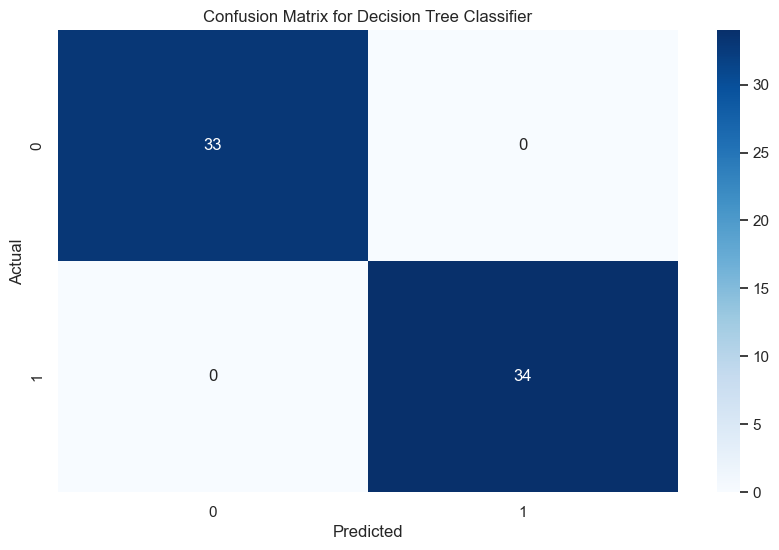

In [173]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dc), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()